### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

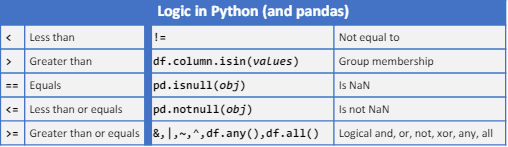

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data={"a": [4, 5, 6, 6],"b": [7, 8, 9, 9],"c": [10, 11, 12, 12]}
# df = pd.DataFrame(data, index=["a","b","c","d"])
df = pd.DataFrame(data, index=list('abcd'))
df

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12
d,6,9,12


#### 1) != : Not equal to

In [ ]:
# b 컬럼의 값 중 7과 같지 않은 것

df["b"]!= 7

a    False
b     True
c     True
d     True
Name: b, dtype: bool

In [ ]:
# b 컬럼의 값 중 7과 같지 않은 것을 찾아서 DataFrame 형태로

df[df["b"]!= 7]

,a,b,c
b,5,8,11
c,6,9,12
d,6,9,12


In [ ]:
# a, b 컬럼에서 b 컬럼이 가지고 있는 값이 7이 아닌 것들만 보고 싶다면?

# df[df["b"]!= 7][["a","b"]]

df.loc[df["b"]!= 7,["a","b"]]

,a,b
b,5,8
c,6,9
d,6,9


#### 2) isin() : 지정된 값이 들어 있느냐?

In [ ]:
df.a.isin?

In [ ]:
# 컬럼의 값이 한글이나 특수문자 인 경우에는 대괄호 쓰는게 좋음

df.a.isin([5])

a    False
b     True
c    False
d    False
Name: a, dtype: bool

In [ ]:
# df[df.a.isin([5])]

df[df.a == 5]

,a,b,c
b,5,8,11


#### 3) isnull()

In [ ]:
df = pd.DataFrame(
    {
        "a":[4,5,6,6,np.nan],
        "b":[7,8,np.nan,9,9],
        "c":[10,11,12,np.nan,12]
    },
    index=[1,2,3,4,5]
)
df

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


In [ ]:
# 널값(결측치) 확인

df.isnull()

,a,b,c
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,True
5,True,False,False


In [ ]:
# a 컬럼에 null 값이 있는가?

df["a"].isnull()

1    False
2    False
3    False
4    False
5     True
Name: a, dtype: bool

In [ ]:
# 널 개수

df.isnull().sum()

a    1
b    1
c    1
dtype: int64

#### 4) isna()

In [ ]:
df.isna()

,a,b,c
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,True
5,True,False,False


In [ ]:
df.isna().sum()

a    1
b    1
c    1
dtype: int64

#### 4) notnull()

In [ ]:
df.notnull()

,a,b,c
1,True,True,True
2,True,True,True
3,True,False,True
4,True,True,False
5,False,True,True


In [ ]:
df[df.notnull()]

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


In [ ]:
df[df.a.notnull()]

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN


a    4
b    4
c    4
dtype: int64

1     True
2     True
3     True
4     True
5    False
Name: a, dtype: bool

*  &    |  ~     ^  df.any(), df.all() => 데이터프레임에서 사용시
* and, or, not, xor, any, all => 파이썬에서 사용시

#### 5) any() : 하나라도 True 이면 True 돌려줌

In [ ]:
df.any?

In [ ]:
df

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


In [ ]:
df.any()

a    True
b    True
c    True
dtype: bool

In [ ]:
pd.Series([False,False]).any()

False

In [ ]:
pd.Series([True,False]).any()

True

#### 6) all() : 모든 값이 True 여야 True 돌려줌

In [ ]:
df.all()

a    True
b    True
c    True
dtype: bool

In [ ]:
pd.Series([False,False]).all()

False

In [ ]:
pd.Series([True,False]).all()

False

#### and, or 는 파이썬, &, | 는 판다스

In [ ]:
4 and 5

5

In [ ]:
3.0 and 5.0

5.0

In [ ]:
True and False

False

In [ ]:
# python 문법에서는 and pandas 는 안됨

df[df.b == 7] and df[df.a == 5]

In [ ]:
# b 컬럼이 7이고 a 컬럼이 5인 행 찾기

df[(df.b == 7) & (df.a == 5)]

,a,b,c


In [ ]:
# b 컬럼이 7이거나 a 컬럼이 5인 행 찾기
df[(df.b == 7) | (df.a == 5)]

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
